## Import Software Libraries

In [2]:
# Read System Parameters
import sys

# Multidimensional arrays
import numpy as np

#Manipulation and Analyze Data
import pandas as pd

#Advance Mathematical Functions
import scipy as sp
from scipy import stats

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering and Machine Learning Algorithm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Encode Data and Suppress Warnings
import category_encoders as ce
import warnings

#Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- Numpy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Scipy {}'.format(sp.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Scikit-Learn {}'.format(sklearn.__version__))
print('- Category Encoders {}'.format(ce.__version__))

Libraries used in this project:
- Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
- Numpy 1.21.5
- Pandas 1.4.2
- Scipy 1.7.3
- Matplotlib 3.5.1
- Seaborn 0.11.2
- Scikit-Learn 1.0.2
- Category Encoders 2.5.1.post0


In [3]:
user_data = pd.read_pickle("users_data_cleaned.pickle")
user_data.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


## Check the shape of the data

In [4]:
user_data.shape

(45209, 19)

## Check the number of unique users

In [5]:
len(np.unique(user_data.user_id))

45209

In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [10]:
#menngelompokan berdasarkan tipe data
user_data.columns.to_series().groupby(user_data.dtypes).groups

{bool: ['default', 'housing', 'loan', 'term_deposit'], int64: ['age', 'duration', 'campaign', 'pdays', 'previous'], float64: ['number_transactions', 'total_amount_usd'], datetime64[ns]: ['date_joined'], object: ['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']}

## Check for Correlations

In [11]:
# abs nilai absolut
user_data.corr().abs()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,0.163409,0.008813,0.138838,0.030429,0.075319,0.017220,0.026431,0.030751,0.023046,0.053390
total_amount_usd,0.163409,1.000000,0.095839,0.065390,0.066857,0.084526,0.022586,0.017274,0.006435,0.016952,0.050785
age,0.008813,0.095839,1.000000,0.017875,0.185552,0.015641,0.004645,0.004767,0.023745,0.001297,0.025168
default,0.138838,0.065390,0.017875,1.000000,0.006020,0.077232,0.010017,0.016819,0.029982,0.018331,0.022421
housing,0.030429,0.066857,0.185552,0.006020,1.000000,0.041341,0.005041,0.023583,0.124197,0.037087,0.139161
loan,0.075319,0.084526,0.015641,0.077232,0.041341,1.000000,0.012395,0.009972,0.022762,0.011048,0.068193
duration,0.017220,0.022586,0.004645,0.010017,0.005041,0.012395,1.000000,0.084551,0.001549,0.001213,0.394549
campaign,0.026431,0.017274,0.004767,0.016819,0.023583,0.009972,0.084551,1.000000,0.088636,0.032860,0.073179
pdays,0.030751,0.006435,0.023745,0.029982,0.124197,0.022762,0.001549,0.088636,1.000000,0.454817,0.103616
previous,0.023046,0.016952,0.001297,0.018331,0.037087,0.011048,0.001213,0.032860,0.454817,1.000000,0.093232


## Generate summary statistics for all of the data

In [17]:
user_data.describe(datetime_is_numeric=True, include='all')

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
count,45209,35210.000000,35210.000000,45209.000000,44921,45209,43352,45209,45209,45209,32191,45209.000000,45209.000000,45209.000000,45209.000000,8252,45209,45179,45115
unique,45209,NaN,NaN,NaN,11,3,3,2,2,2,2,NaN,NaN,NaN,NaN,3,2,NaN,3
top,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,NaN,NaN,NaN,blue-collar,married,secondary,False,True,False,cellular,NaN,NaN,NaN,NaN,failure,False,NaN,mobile
freq,1,NaN,NaN,NaN,9731,27212,23202,44394,25128,37965,29285,NaN,NaN,NaN,NaN,4901,39920,NaN,27504
mean,NaN,3.977052,1369.417751,40.935853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.153067,2.763897,40.199651,0.580349,NaN,NaN,1999-06-14 21:54:38.558622336,NaN
min,NaN,1.000000,-8019.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,1988-01-01 00:00:00,NaN
25%,NaN,2.000000,73.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,1993-09-18 00:00:00,NaN
50%,NaN,3.000000,451.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,1999-06-11 00:00:00,NaN
75%,NaN,4.000000,1438.000000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,2005-03-18 00:00:00,NaN
max,NaN,20.000000,102127.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4918.000000,63.000000,871.000000,275.000000,NaN,NaN,2010-11-30 00:00:00,NaN


## Generate skewnes (kecondongan) and kurtosis (keruncingan) measurements

In [18]:
user_data.skew()

C:\Users\BPOM\AppData\Local\Temp\ipykernel_20816\1214572232.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  user_data.skew()


number_transactions     2.704543
total_amount_usd        8.596128
age                     0.684861
default                 7.245206
housing                -0.224686
loan                    1.852545
duration                3.144556
campaign                4.898555
pdays                   2.615635
previous               41.845672
term_deposit            2.383403
dtype: float64

In [19]:
user_data.kurt()

C:\Users\BPOM\AppData\Local\Temp\ipykernel_20816\3515063524.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  user_data.kurt()


number_transactions       6.659034
total_amount_usd        150.790967
age                       0.319760
default                  50.495241
housing                  -1.949602
loan                      1.431987
duration                 18.155941
campaign                 39.248145
pdays                     6.934713
previous               4506.684640
term_deposit              3.680770
dtype: float64

## Plot Histogram for all numerical columns

In [26]:
#boolean karena bernilai 0 dan 1
user_data_for_hist = user_data.select_dtypes(exclude='bool')

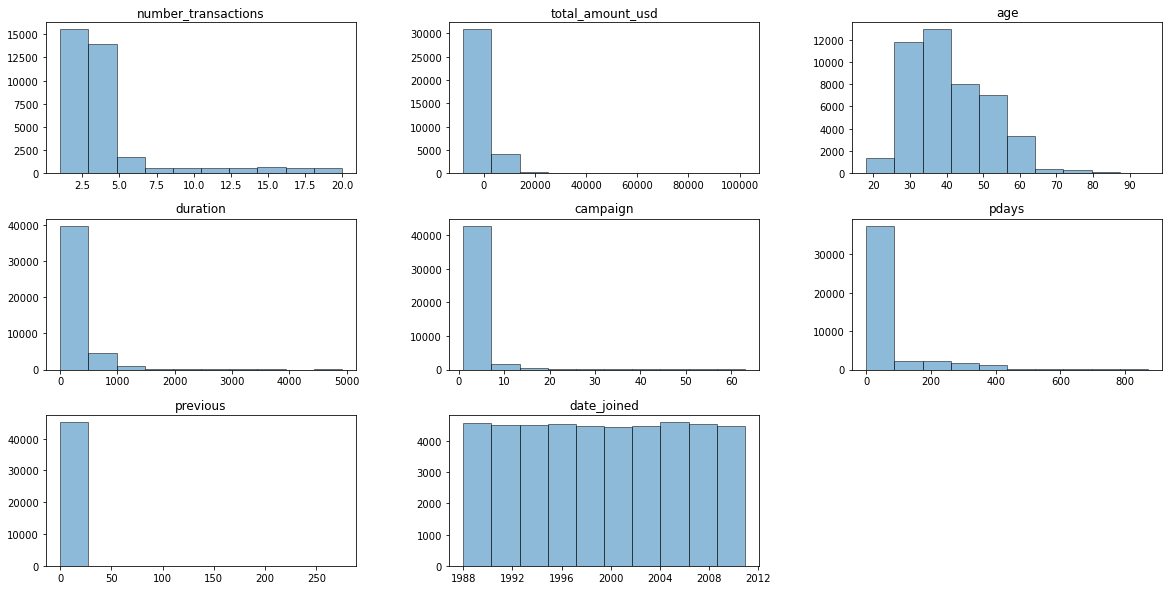

In [33]:
user_data_for_hist.hist(figsize=(20,10),alpha = 0.5,edgecolor = 'black', grid=False);

## Generate a box plot for age

In [35]:
user_data['age'].describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64